# EN.605. 646 01 : Natural Language Processing 
# Lab 1 (Tim Chen)
## (a) Tokenization

### Processing Description:

1. **Punctuation Generation**: For generating all possible punctuation marks, we're looping through the entire Unicode range. For every character, we're checking its Unicode category. If the category is 'Po' (which stands for punctuation, other), we add the punctuation to our list. Common characters like spaces, newlines, tabs, hyphens, and brackets are also added explicitly.
  
2. **Number Characters Definition**: We're defining number characters simply by creating a list of strings from 0 to 9.

3. **Regex Pattern Compilation**: The combined list of punctuation and number characters is used to create a regex pattern. The purpose is to use this pattern to split a given string based on these characters, but still include these characters in the split tokens.

4. **Text Tokenization**: The code then reads a file named 'tokens.txt' and processes the first 10 lines of the file. For each line, the code tokenizes the line using the previously defined regex pattern, converts the tokens to lowercase, and then filters out any token that is either empty or just a space.

### Sources of Error and Undesirable Results:

1. **Escape Characters in Regex**: The use of `re.escape()` while adding punctuation ensures that characters which have special meaning in regex (like `.` or `*`) do not throw off the regex compilation or operation. 

2. **Numbers and Punctuation Overlap**: By splitting based on both punctuation and numbers, you might end up splitting strings that shouldn't be split (e.g., "3.14" would split into "3", ".", "14").

3. **Chinese and Other No-Spacing Sentences**: Tokenizing languages like Chinese, where there are no spaces between words, can be challenging. The current method doesn't differentiate between punctuation used to end a sentence and punctuation used in other contexts.

4. **Case Sensitivity**: Converting tokens to lowercase might lead to a loss of meaning in some contexts. For instance, "US" and "us" have different meanings. 

5. **Handling of Spaces**: The current approach filters out spaces, but spaces themselves might be significant in some contexts or applications.

###  Ways to Address Issues:

1. For numbers like "3.14", a more sophisticated tokenizing approach could be used, where periods surrounded by digits aren't treated as punctuation.
  
2. For Chinese and other similar languages, one might need domain-specific tokenization libraries or methods that are built to understand the language's semantics.

In [10]:
import re
import unicodedata

### Chat GPT Start ###
# prompt: can you generate all possible punctuation marks?
punctuation = [' ', '\n', '\t', '\r']
for i in range(0x110000):  # Go through all valid code points in Unicode
    char = chr(i)
    if unicodedata.category(char).startswith('P'):
        punctuation.append(re.escape(char))
### Chat GPT End ###

# define number characters
nums = [str(i) for i in range(10)]

# generate regex pattern
pattern = re.compile(f"({'|'.join(punctuation + nums)})")

# process text to tokens
tokens = []
with open('./assets/tokens.txt', 'r') as f:
    lines = f.readlines()
    for i, line in enumerate(lines[:10]):
        tokens = [token.lower() for token in re.split(pattern, line) if token and token != ' ']
        print(f'line {i+1}:')
        print(tokens)
        print()

line 1:
['russian', 'for', 'plastic', 'bag', 'is', 'полиэтиленовый', 'пакет', '.', '7', '.', '3', 'out', 'of', '1', '0', 'statistics', 'is', 'made', 'up', '.', 'i', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham', '.', 'i', 'do', '\n']

line 2:
['not', 'like', 'them', 'sam', '-', 'i', '-', 'am', '.', 'dr', '.', 'mulholland', 'lives', 'on', 'mulholland', 'dr', '.', 'in', 'hollywood', '.', '1', ',', '2', ',', '3', '.', '.', '.', 'slashdot', '.', 'com', 'has', 'some', 'interesting', '\n']

line 3:
['articles', '.', 'i', "'", 'm', 'going', 'to', 'update', 'my', 'resumé', '.', 'j', '.', 'h', '.', 'u', '.', 'has', 'a', 'great', 'la', '-', 'crosse', 'team', '.', 'born', 'in', 'the', 'u', '.', 's', '.', 'of', 'a', '.', 'incorrect', 'plurala', 'can', 'be', '\n']

line 4:
['fun', '.', 'is', 'capitalization', '(', 'sp', '?', ')', 'truly', 'necessary', '?', 'i', 'think', 'lower', 'case', 'is', 'more', 'legible', '.', 'when', 'people', 'write', 'in', 'all', 'caps', ',', 'it', 'feels', '\n']

lin

## (b) Corpus statistics

In [58]:
n_lines = 0
n_tokens = 0
n_vocab = 0
n_vocab_orphan = 0

# tokenization
tokens = []
with open('./assets/tokens.txt', 'r') as f:
    lines = f.readlines()
    # get number of lines
    n_lines = len(lines)
    for line in lines:
        tokens += [token.lower() for token in re.split(pattern, line) if token and token != ' ']

In [67]:
def stats(tokens):
    # get number of tokens
    n_tokens = len(tokens)

    # calculate tokens statistics
    counter = {}
    for token in tokens:
        if token not in counter:
            counter[token] = 0
        counter[token] += 1
    sorted_counter = sorted(counter.items(), key=lambda x:x[1], reverse=True)

    n_vocab = len(counter)
    n_vocab_orphan = sum([1 for token in counter if counter[token] == 1])

    print_width = 10
    print(f'{"Number of Lines:":<45} {n_lines}')
    print(f'{"Number of unique tokens (vocabulary size):":<45} {n_vocab}')
    print(f'{"Number of tokens (collection size):":<45} {n_tokens}')
    print(f'{"Number of singleton terms:":<45} {n_vocab_orphan}')
    print(f'{"Percentage of singletons:":<45} {(n_vocab_orphan/n_vocab):.2%}')
    print()
    print('Top 10000 frequent tokens:')
    for i, pair in enumerate(sorted_counter[:100]):
        if pair[0] == '\n':
            pair = ('\\n', pair[1])
        print(f'  {str(i+1)+".":>6} {pair[0]:<10}{pair[1]}')
    for i in [500, 1000, 5000, 10000]:
        print(f'  {str(i)+".":>6} {sorted_counter[i-1][0]:<10}{sorted_counter[i-1][1]}')
    print()

stats(tokens)

Number of Lines:                              944802
Number of unique tokens (vocabulary size):    261055
Number of tokens (collection size):           25572790
Number of singleton terms:                    137118
Percentage of singletons:                     52.52%

Top 10000 frequent tokens:
      1. the       1156385
      2. .         1128583
      3. ,         1027875
      4. \n        944802
      5. to        566820
      6. and       536552
      7. of        488881
      8. a         463264
      9. in        393733
     10. 0         267730
     11. -         243360
     12. 1         230317
     13. for       215585
     14. that      203139
     15. is        202533
     16. s         200061
     17. ’         187233
     18. 2         181358
     19. on        166437
     20. it        156512
     21. with      149653
     22. '         141226
     23. was       130759
     24. at        128230
     25. "         126344
     26. i         118790
     27. as        113572


## (c) Zipf’s Law

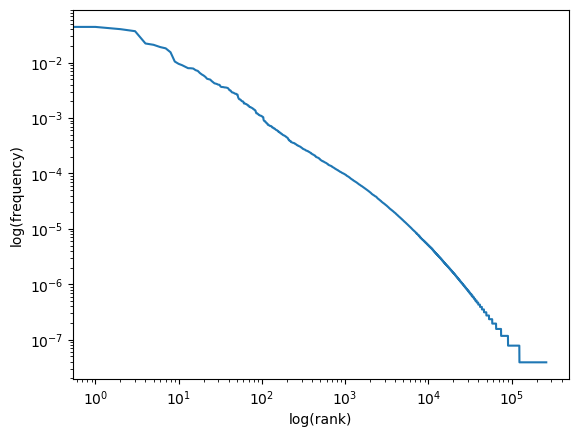

In [17]:
import matplotlib.pyplot as plt

data = []
for pair in sorted_counter:
    data.append(pair[1]/n_tokens)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.plot(data)
plt.show()

### Analysis
The plot looks like a slightly concave diagonal, it indicates that while the tokens frequency exhibits tendencies in line with Zipf's law, it isn't a perfect match. The concavity suggests that medium-frequency words might be appearing more frequently than what pure Zipfian distribution would suggest.

## (d) Sentence  Boundary  Detection

In [45]:
def find_sentence_boundaries(text):
    # List of common abbreviations that might create false positives.
    ### Chat GPT Start ###
    # prompt: give me more abbreviations (with context)
    abbreviations = [
        'Mr.', 'Mrs.', 'Ms.', 'Dr.', 'Jr.', 'Sr.', 'St.', 'Ave.', 'Blvd.', 'Rd.',
        'Prof.', 'Gen.', 'Capt.', 'Cpl.', 'Sgt.', 'Mt.', 'Ft.', 'Ph.D.', 'M.A.', 'B.A.',
        'B.S.', 'M.S.', 'etc.', 'e.g.', 'i.e.', 'U.S.', 'U.K.', 'U.N.', 'NATO', 'NASA',
        'FBI', 'CIA', 'ETA', 'ATM', 'ASAP', 'TV', 'DJ', 'MC', 'CEO', 'CFO', 'COO',
        'M.D.', 'R.N.', 'L.P.N.', 'D.D.S.', 'D.M.D.', 'P.A.', 'LLC', 'Inc.', 'Corp.',
        'A.M.', 'P.M.', 'No.', 'vol.', 'ed.', 'chap.', 'sec.', 'vs.', 'v.', 'Jan.', 
        'Feb.', 'Mar.', 'Apr.', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.'
    ]
    ### Chat GPT End ###
    
    # Split the text by spaces and keep track of indices.
    words = text.split(' ')
    indices = [0]
    for word in words[:-1]:
        indices.append(indices[-1] + len(word) + 1)
    
    boundaries = []
    for i, (index, word) in enumerate(zip(indices, words)):
        if not word:
            continue

        # Check if it's the end of the string
        if i == len(words) - 1:
            boundaries.append(index + len(word) - 1)
            continue
                
        # If the word has an end-of-sentence punctuation
        if word.endswith(('.', '!', '?')):
            
            # Check if it's a decimal number
            if re.search(r'\d+\.\d+', word):
                continue
            
            # Check if it's an abbreviation
            if word in abbreviations or (len(word)>1 and word[-2].isupper() and word.endswith('.')):
                continue

            # If next word starts with a capital letter, it's likely a boundary
            if words[i + 1] and (words[i + 1][0].isupper() or words[i + 1][0] == '"'):
                boundaries.append(index + len(word) - 1)
                
    return boundaries

# Test
text = "I came. I saw! I conquered"
print(find_sentence_boundaries(text))

[6, 13, 25]


### Compute & save the output file

In [46]:
sentences_res = []

with open('./assets/sentences.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        sentences_res.append(find_sentence_boundaries(line[:-1]))

with open('./output/tchen124.txt', 'w') as f:
    for res in sentences_res:
        res = [str(idx) for idx in res]
        f.write(f'{len(res)} {" ".join(res)}'+'\n')

### Estimation of accuracy
Define:
Accuracy = (Number of Correctly Identified Sentences / Total Number of Sentences) * 100

Below we manually check the first 10 inputs and compare it we the above result

In [52]:
manual_check = [
    [27, 236],
    [230, 297],
    [229, 399, 524],
    [253],
    [87, 312, 515],
    [74, 171, 265],
    [205],
    [85],
    [52, 304],
    [191, 264]
]

test_res = []
for i in range(10):
    test_res.append(sentences_res[i] == manual_check[i])

print(f'ACC: {sum(test_res)/len(test_res):.2%}')

ACC: 80.00%


## (e) NLTK

In [65]:
from nltk.tokenize import word_tokenize, sent_tokenize

nltk_tokens = []
nltk_n_sentence = []
with open('./assets/tokens.txt', 'r') as f:
    lines = f.readlines()
    # get number of lines
    n_lines = len(lines)
    for line in lines:
        nltk_tokens += word_tokenize(line)
        nltk_n_sentence.append(len(sent_tokenize(line)))

### Tokenization Analysis
Let's first look at NLTK's statistics

In [68]:
stats(nltk_tokens)

Number of Lines:                              944802
Number of unique tokens (vocabulary size):    441458
Number of tokens (collection size):           23002384
Number of singleton terms:                    262861
Percentage of singletons:                     59.54%

Top 10000 frequent tokens:
      1. the       1006526
      2. ,         1004748
      3. .         947137
      4. to        558319
      5. and       519771
      6. of        485199
      7. a         429196
      8. in        363268
      9. for       203198
     10. is        201258
     11. that      190987
     12. ’         187233
     13. on        157566
     14. The       147036
     15. with      143212
     16. was       131600
     17. at        121140
     18. I         117075
     19. it        112218
     20. s         109856
     21. be        106917
     22. “         106826
     23. as        102664
     24. ”         102222
     25. are       101178
     26. said      94264
     27. have      90804
   

### Differences between the two (Lab vs NLTK)
1. Vocabulary & Collection Size: NLTK is more fine-grained, resulting in a larger vocabulary but a smaller collection size.
2. Singletons: NLTK has a higher percentage of singletons due to its fine granularity.
3. Top Tokens:
    * Our tokenizer recognizes newlines and numbers prominently.
    * NLTK differentiates between capitalized and lowercase words and has a unique way of handling quotes.
4. Specific Tokens: Tokens like "black" and "schools" rank differently in the two outputs, suggesting different tokenization behaviors.

### Sentence Splitting Analysis

In [87]:
n_sentence = []
for res in sentences_res:
    n_sentence.append(len(res))

sentence_diff = []
for i in range(len(n_sentence)):
    sentence_diff.append(n_sentence[i] - nltk_n_sentence[i])

Let's first look at the differences of splitted sentences number between Lab & NLTK

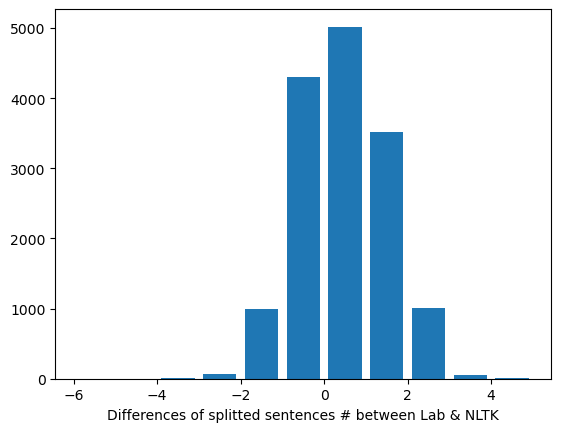

In [93]:
plt.hist(sentence_diff, rwidth=0.8, bins=range(min(sentence_diff), max(sentence_diff) + 1, 1))
plt.xlabel('Differences of splitted sentences # between Lab & NLTK')
plt.show()

### Differences between the two (Lab vs NLTK)
1. Central Tendency:
    * Most differences cluster around 0, meaning both methods frequently agree on sentence counts.
2. Skewness:
    * The distribution appears slightly skewed to the right of 0. This indicates that there are more instances where NLTK has split texts into additional sentences compared to your lab method.
3. Magnitude of Differences:
    * There are 4,306 instances where NLTK has exactly one more sentence than the lab method.
    * Conversely, there are 998 instances where your lab method identified one more sentence than NLTK.
4. Outliers:
    * On the negative side (where the lab has more sentences): The most extreme difference is -6, but it's rare (only once).
    * On the positive side (where NLTK has more sentences): The most extreme difference is 5, and it has occurred 6 times.
5. Minor Differences:
    * Differences of 1 sentence (either way) dominate, followed by differences of 2 sentences. Larger differences are increasingly rare.

In conclusion, both methods are quite consistent, with the majority of differences being relatively minor. However, the distribution suggests that NLTK occasionally splits sentences more often than your lab method.